Now, let's represent how these variables correlate with one another among the monthly dataset at 1 hPa. For this, we'll use a binned analysis. First, let's load our data.

In [3]:
import xarray as xarr

filename = "CONUS_clipped_precipitation_temperature_1988.nc"
data = xarr.open_dataset(filename)

Now, we can calculate the mean across each time point across all latitudes and longitudes.

In [ ]:
# calculate nationwide average across the year
temp_timeseries = data['t'].mean(dim=['latitude', 'longitude']).values.flatten()
clwc_timeseries = data['clwc'].mean(dim=['latitude', 'longitude']).values.flatten()

[276.50632 279.30624 283.70972 289.41013 294.67615 299.90796 301.82007
 301.31357 296.83047 291.2707  285.14014 279.8026 ]


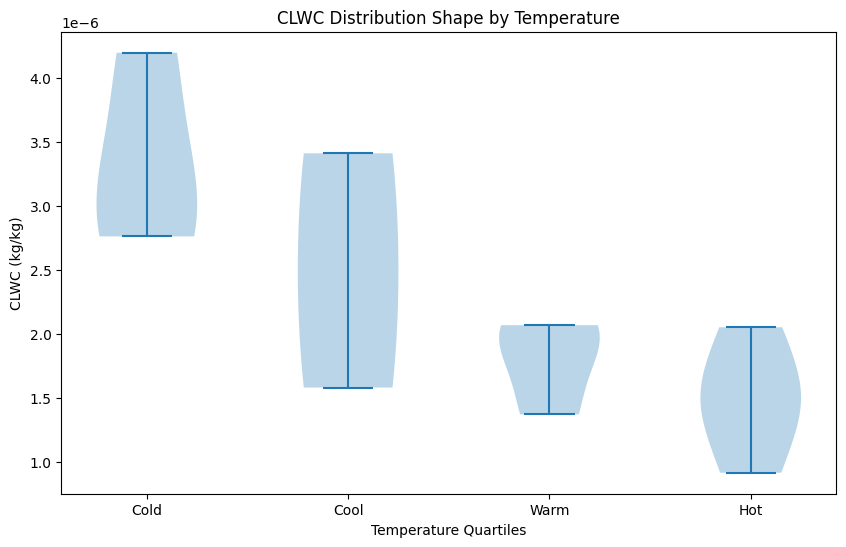

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create quartile bins directly with xarray
temp_ts = data["t"].mean(dim=['latitude', 'longitude']).dropna(dim='valid_time')
clwc_ts = data["clwc"].mean(dim=['latitude', 'longitude']).dropna(dim='valid_time')

# Group by quartiles using xarray
quartile_groups = clwc_ts.groupby_bins(temp_ts, 4, labels=['Cold', 'Cool', 'Warm', 'Hot'])

# Extract data for plotting
quartile_data = [group.values for label, group in quartile_groups]

plt.figure(figsize=(10, 6))
plt.violinplot(quartile_data, positions=[1, 2, 3, 4])
plt.xticks([1, 2, 3, 4], ['Cold', 'Cool', 'Warm', 'Hot'])
plt.ylabel('CLWC (kg/kg)')
plt.xlabel('Temperature Quartiles')
plt.title('CLWC Distribution Shape by Temperature')
plt.show()